### Importieren wichtiger Bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Die Filmdaten Zeigen

In [2]:
# CSV-Datei in pandas DataFrame laden
df = pd.read_csv('data/movies_2015_2023.csv')
df

,title,release_year,language,overview,vote_average,vote_count,popularity
0,Uri: The Surgical Strike,2019,Indisch,Following the roguish terrorist attacks at Uri...,7.067,420,76.363
1,Attack,2022,Indisch,"With the Parliament under siege, India’s first...",6.735,204,68.613
2,Jawan,2023,Indisch,"An emotional journey of a prison warden, drive...",7.200,241,58.234
3,Tumbbad,2018,Indisch,"India, 1918. On the outskirts of Tumbbad, a cu...",7.492,241,57.667
4,Animal,2023,Indisch,The hardened son of a powerful industrialist r...,6.466,104,40.951
...,...,...,...,...,...,...,...
11995,Torve Fantasie,2019,Italienisch,NaN,0.000,0,0.839
11996,When Nuvolari Runs: The Flying Mantuan,2018,Italienisch,Tazio Giorgio Nuvolari (16 November 1892 - 11 ...,5.667,6,0.838
11997,Baldus,2022,Italienisch,NaN,0.000,0,0.837
11998,Pastime,2019,Italienisch,A retired teacher is sitting at a table outsid...,0.000,0,0.837


### Die Zeilen mit NaN-Werten in der Spalte 'overview' Entfernen

In [3]:
df = df.dropna(subset=['overview'])

# Überprüfe, ob noch NaN-Werte vorhanden sind
print(df.isna().sum())


title           0
release_year    0
language        0
overview        0
vote_average    0
vote_count      0
popularity      0
dtype: int64


In [4]:
df

,title,release_year,language,overview,vote_average,vote_count,popularity
0,Uri: The Surgical Strike,2019,Indisch,Following the roguish terrorist attacks at Uri...,7.067,420,76.363
1,Attack,2022,Indisch,"With the Parliament under siege, India’s first...",6.735,204,68.613
2,Jawan,2023,Indisch,"An emotional journey of a prison warden, drive...",7.200,241,58.234
3,Tumbbad,2018,Indisch,"India, 1918. On the outskirts of Tumbbad, a cu...",7.492,241,57.667
4,Animal,2023,Indisch,The hardened son of a powerful industrialist r...,6.466,104,40.951
...,...,...,...,...,...,...,...
11991,Odissea nell'ospizio,2019,Italienisch,Four sixty-something disgraced comedians - who...,5.500,1,0.841
11992,Walls,2023,Italienisch,"For her debut film, model-actor turned filmmak...",6.100,4,0.840
11993,L'ultima bottega,2023,Italienisch,An almost eighty -year -old man works in his w...,0.000,0,0.839
11996,When Nuvolari Runs: The Flying Mantuan,2018,Italienisch,Tazio Giorgio Nuvolari (16 November 1892 - 11 ...,5.667,6,0.838


### Duplikate entfernen

In [5]:
# Entferne doppelte Zeilen, falls vorhanden
df = df.drop_duplicates()

# Überprüfe, ob noch Duplikate vorhanden sind
print(f"Anzahl der Duplikate: {df.duplicated().sum()}")


Anzahl der Duplikate: 0


### Die gültigkeit der Werte überprüfen

In [6]:
# Überprüfe, ob es ungültige Werte außerhalb des Bereichs 0-10 gibt
invalid_votes = df[(df['vote_average'] < 0) | (df['vote_average'] > 10)]

# Zeige die ungültigen Werte an
print(invalid_votes)


Empty DataFrame
Columns: [title, release_year, language, overview, vote_average, vote_count, popularity]
Index: []


In [7]:
# Statistische Beschreibung der 'popularity'-Spalte
print(df['popularity'].describe())

# Überprüfe, ob es negative Werte oder Ausreißer gibt
invalid_popularity = df[df['popularity'] < 0]
print(f"Es gibt {len(invalid_popularity)} ungültige Werte in 'popularity'.")


count    10579.000000
mean        11.590713
std         22.661944
min          0.109000
25%          2.195000
50%          4.434000
75%         11.118000
max        449.330000
Name: popularity, dtype: float64
Es gibt 0 ungültige Werte in 'popularity'.


In [8]:
# Pfad zur Datei
file_path = 'data/movies_2015_2023_cleaned.csv'

# Speichere die bereinigten Daten in einer neuen CSV-Datei, überschreibe wenn sie existiert
df.to_csv(file_path, index=False)

if os.path.exists(file_path):
    print(f"Die Datei '{file_path}' wurde erfolgreich überschrieben und gespeichert.")
else:
    print(f"Die Datei '{file_path}' wurde erfolgreich gespeichert.")


Die Datei 'data/movies_2015_2023_cleaned.csv' wurde erfolgreich überschrieben und gespeichert.


In [9]:
# CSV-Datei in pandas DataFrame laden
df = pd.read_csv('data/movies_2015_2023_cleaned.csv')
df

,title,release_year,language,overview,vote_average,vote_count,popularity
0,Uri: The Surgical Strike,2019,Indisch,Following the roguish terrorist attacks at Uri...,7.067,420,76.363
1,Attack,2022,Indisch,"With the Parliament under siege, India’s first...",6.735,204,68.613
2,Jawan,2023,Indisch,"An emotional journey of a prison warden, drive...",7.200,241,58.234
3,Tumbbad,2018,Indisch,"India, 1918. On the outskirts of Tumbbad, a cu...",7.492,241,57.667
4,Animal,2023,Indisch,The hardened son of a powerful industrialist r...,6.466,104,40.951
...,...,...,...,...,...,...,...
10574,Odissea nell'ospizio,2019,Italienisch,Four sixty-something disgraced comedians - who...,5.500,1,0.841
10575,Walls,2023,Italienisch,"For her debut film, model-actor turned filmmak...",6.100,4,0.840
10576,L'ultima bottega,2023,Italienisch,An almost eighty -year -old man works in his w...,0.000,0,0.839
10577,When Nuvolari Runs: The Flying Mantuan,2018,Italienisch,Tazio Giorgio Nuvolari (16 November 1892 - 11 ...,5.667,6,0.838


### Die Anzahl der Filme pro Sprache

language
Amerikanisch    1999
Indisch         1921
Französisch     1811
Spanisch        1800
Deutsch         1583
Italienisch     1465
Name: count, dtype: int64


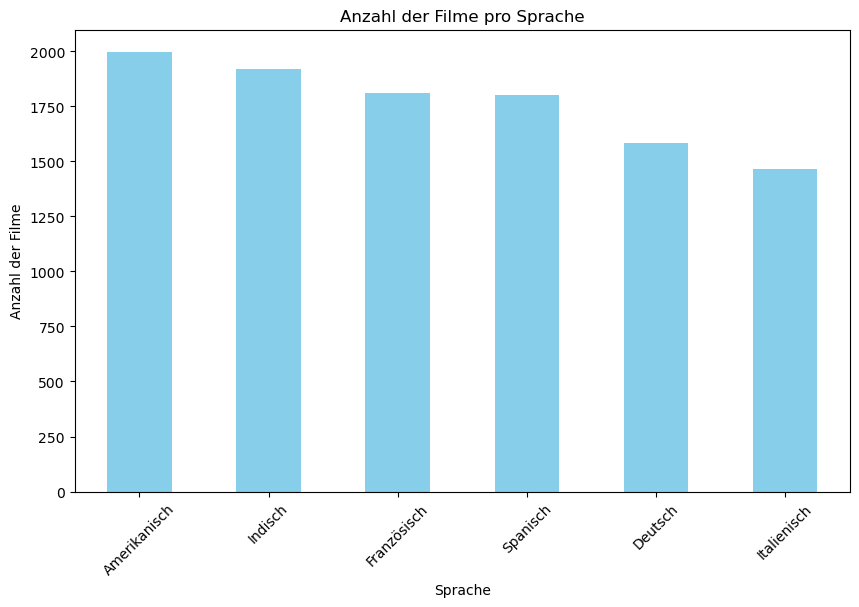

In [10]:
language_counts = df['language'].value_counts()
# Ausgabe der Anzahl der Filme pro Sprache
print(language_counts)

# Visualisiere die Anzahl der Filme pro Sprache als Balkendiagramm
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Anzahl der Filme pro Sprache')
plt.xlabel('Sprache')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=45)
plt.show()

### Downsampling der Mehrheit

language
Amerikanisch    1465
Deutsch         1465
Französisch     1465
Indisch         1465
Italienisch     1465
Spanisch        1465
Name: count, dtype: int64


C:\Users\rawan\AppData\Local\Temp\ipykernel_12700\3585966652.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced_down = df.groupby('language').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


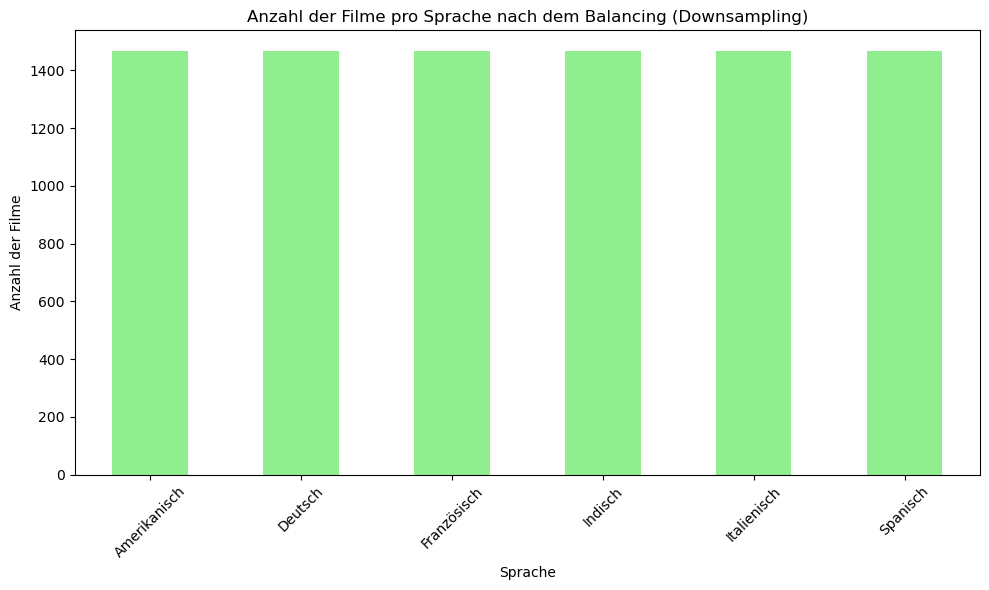

In [11]:
# Finde die minimale Anzahl von Filmen pro Sprache
min_count = df['language'].value_counts().min()

# Für jede Sprache eine zufällige Auswahl an Filmen, basierend auf der minimalen Anzahl
df_balanced_down = df.groupby('language').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

# Überprüfe die Anzahl der Filme pro Sprache nach dem Balancing
print(df_balanced_down['language'].value_counts())

# Visualisiere die Anzahl der Filme pro Sprache nach dem Balancing als Balkendiagramm
plt.figure(figsize=(10, 6))
df_balanced_down['language'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Anzahl der Filme pro Sprache nach dem Balancing (Downsampling)')
plt.xlabel('Sprache')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=45)
plt.tight_layout()  # sorgt für bessere Darstellung
plt.show()


In [12]:
# Speichere die balancierten Daten (Downsampling) in einer neuen CSV-Datei
df_balanced_down.to_csv('data/movies_2015_2023_balanced_down.csv', index=False)

print("Die Downsampling-Daten wurden erfolgreich gespeichert.")

Die Downsampling-Daten wurden erfolgreich gespeichert.


### Oversampling der Minderheit

language
Amerikanisch    1999
Deutsch         1999
Französisch     1999
Indisch         1999
Italienisch     1999
Spanisch        1999
Name: count, dtype: int64


C:\Users\rawan\AppData\Local\Temp\ipykernel_12700\3175944802.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced_over = df.groupby('language').apply(lambda x: x.sample(max_count, replace=True)).reset_index(drop=True)


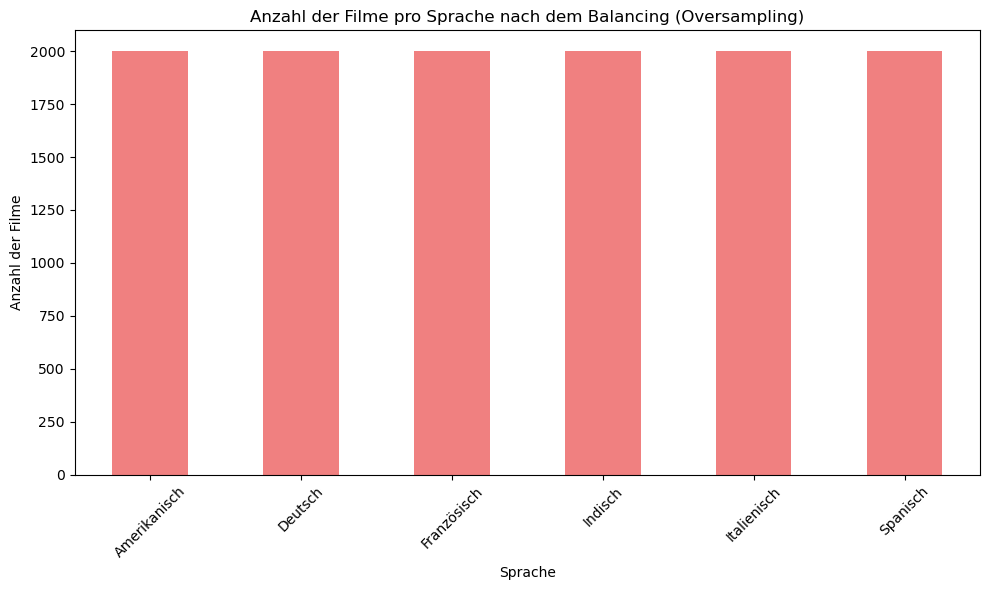

In [13]:
# Finde die maximale Anzahl von Filmen pro Sprache
max_count = df['language'].value_counts().max()

# Für jede Sprache Filme duplizieren, bis sie die maximale Anzahl erreicht
df_balanced_over = df.groupby('language').apply(lambda x: x.sample(max_count, replace=True)).reset_index(drop=True)

# Überprüfe die Anzahl der Filme pro Sprache nach dem Balancing
print(df_balanced_over['language'].value_counts())

# Visualisiere die Anzahl der Filme pro Sprache nach dem Balancing (Oversampling) als Balkendiagramm
plt.figure(figsize=(10, 6))
df_balanced_over['language'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Anzahl der Filme pro Sprache nach dem Balancing (Oversampling)')
plt.xlabel('Sprache')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=45)
plt.tight_layout()  # sorgt für bessere Darstellung des Plots
plt.show()


In [14]:
# Speichere die balancierten Daten (Oversampling) in einer neuen CSV-Datei
df_balanced_over.to_csv('data/movies_2015_2023_balanced_over.csv', index=False)

print("Die Oversampling-Daten wurden erfolgreich gespeichert.")


Die Oversampling-Daten wurden erfolgreich gespeichert.
